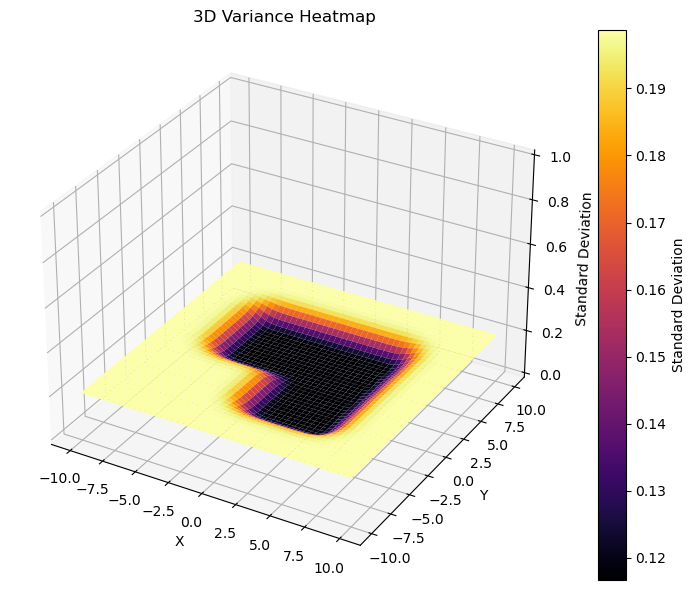

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel

# Generate the dataset
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.exp(-R**2 / 5) * np.sin(R)
Z += 0.1 * np.random.randn(*Z.shape)

# Prepare the data for training
train_input = np.vstack((X.ravel(), Y.ravel())).T
train_output = Z.ravel()

# Apply the mask to filter the training data
mask = (train_input[:, 0] >= 0) | (train_input[:, 1] >= 0)
filtered_input = train_input[mask]
filtered_output = train_output[mask]

# Define the kernel with noise assumption
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the GP model with the filtered data
gp.fit(filtered_input, filtered_output)

# Predict using the GP model across the original grid to get standard deviation (uncertainty)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.exp(-R**2 / 5) * np.sin(R)

# Prepare the data for training
train_input = np.vstack((X.ravel(), Y.ravel())).T

_, std_dev = gp.predict(train_input, return_std=True)
std_dev = std_dev.reshape(100, 100)

# Visualize the variance (standard deviation) as a 3D heatmap
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, std_dev, cmap='inferno', edgecolor='none', antialiased=True)
fig.colorbar(surf, ax=ax, label='Standard Deviation')
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Standard Deviation')
ax.set_title('3D Variance Heatmap')

plt.tight_layout()
plt.show()